<img src="./img/HWNI_logo.svg"/>

# Lab 01b - Review of Descriptive Statistics with Pandas and Seaborn

We'll begin by going over both key notions from probability and some of the most fundamental statistics -- means, medians, and so on. We'll also take this opportunity to practice using the technological tools we'll need for this course. 

If you've never done any computer programming before, make sure to work through the [Codecademy Python course](https://www.codecademy.com/learn/python) through Lesson 9 as soon as possible. You won't necessarily need it to make it through this lab, but baseline comfort with programming is a key skill for this course and for most of science today.

## What is a statistic?

A *statistic* is a number or collection of numbers that we calculate from a dataset. Examples of statistics include the average, the largest or smallest value, the largest and smallest values, the first or third or $N$th value, or even the entire dataset.

One common goal we have when calculating statistics is to *describe* the data. This is called, senseibly enough, *descriptive statistics*. In the field of statistics, we study the properties of these descriptions: which datasets do they summarize well? when does a difference in a statistic mean the datasets are different? how can I tell whether one statistic or another is a better summary of the data?

Our goal is *understanding* data -- being able to build models that describe it well or being able to predict the behavior of a system well enough to control it (e.g. to fix it when it is broken, as in medicine).

To get our hands on some statistics, we first need a dataset. We'll be working with two. For concreteness' sake, let's say one represents the number of spikes produced by a neuron in response to repeated presentations of some stimulus and the other represents the reaction times of a subject during a cognitive task.

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

# numpy - linear algebra and matrices for python
import numpy as np

# pandas - "DataFrames" to organize our data
import pandas as pd

# matplotlib - workhorse plotting library
import matplotlib.pyplot as plt

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab01utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

We begin, once we've loaded our data, by printing it out in its entirety.

In [2]:
dfSpike = pd.DataFrame.from_csv('./data/spikecounts.csv')
dfTimes = pd.DataFrame.from_csv('./data/reactiontimes.csv')

dfSpike

,counts
0,0
1,0
2,1
3,0
4,2
5,0
6,0
7,2
8,1
9,0


As far as descriptions of a dataset go, a list of every data point is an accurate one, but not a very useful one.

Next, we'll go over how to plot our whole dataset at once, getting a "visual summary" that can give us some intuition for what's going on in our data. Then, we'll go over some descriptive statistics that can numerically summarize our data and methods for visualizing those statistics.

But first, we'll talk a bit about how we organize our data.

# Organizing Data

In the last lab, we talked about two ways of representing probability mass functions: as lists and as dictionaries. Lists and dictionaries are examples of what are called *data structures*. Data structures help us organize information when working with computer programs. Lists and dictionaries are extremely flexible data structures that can be used for a wide variety of purposes -- even implementing whole programming languages! 

We're interested in a somewhat smaller range of applications: statistical operations on complex datasets. For this, we turn to a specialized kind of "rectangular dictionary": the *dataframe*.

### Pandas Dataframes

A list would be sufficent for what we'll be doing in this lab, where all we have is a list of data values.
However, in neuroscience we often have to deal with complicated datasets -- a full "data point" from a neuroscience experiment might include several numbers (input stimulus and neural response) along with a host of metadata -- subject ID, brain region, genotype, experiment date, and so on. In principle, it's possible to organize all of this information in a collection of arrays, lists, dictionaries, and so on, but it's easy to make mistakes and hard to keep everything in agreement.

The standard solution to this problem is a data structure called a *dataframe* or a *table*. A dataframe is like a two-dimensional array that isn't restricted to holding only numbers and that uses either numbers or strings as indices. That might remind you of a dictionary, and it should: a dataframe is like a dictionary of arrays that are all the same length.

In Python, the most popular implementation of dataframes is in the `pandas` library. To start getting used to pandas, we'll use it in this lab, even though it isn't strictly necessary. If you'd like to learn more about how to use pandas, check out the tutorial on using pandas in the `Tech Tools Tutorials/` folder.

# Visualizing Data

Now that we understand how our data is organized, let's start visualizing it. Pandas dataframes work well with a statistical visualization package called `seaborn`, on which there's more in the tutorial *Plotting with Seaborn*. That tutorial is meant to serve as a reference for most of the plotting we'll need to do through the course, so there's no need to work through the entirety of it just now. We'll also discuss plotting with seaborn and matplotlib in more detail below.

You might be familiar with *scatterplots*, which show pairs of data values as points in a two-dimensional plane. The one-dimensional equivalent of a scatterplot is called a *rugplot*, after its passing resemblance to a shag carpet. In a rugplot, we simply place a small tickmark at each number where we observed a data value, as below:

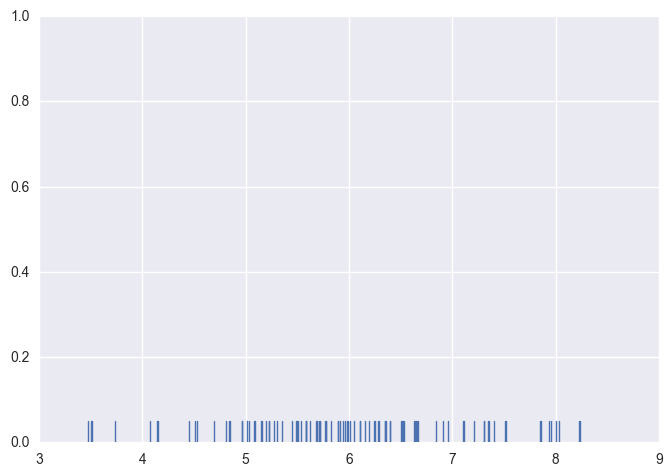

In [3]:
# sns is our alias for seaborn
#  and we call the rugplot function 

sns.rugplot(dfTimes);

This gives us a sense of where the data values fall -- they appear to be clustered somewhat around 5.5 or 6, and to be somewhat evenly distributed on both sides of that value.

Now, use `sns.rugplot` on the spike data, `dfSpike`:

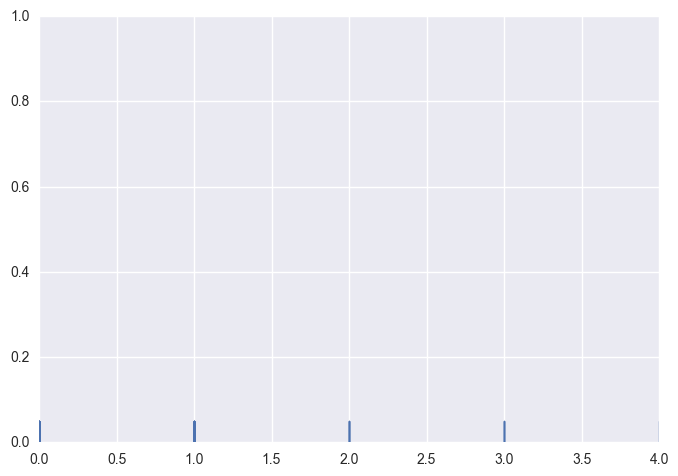

In [4]:
sns.rugplot(dfSpike);

This rugplot is much less informative.

#### Q1 Can you explain why? Think back to the distinction between probability mass functions and probability density functions in the first half of the lab.

<font color='#1874CD'> ** Events are discrete, so we're trying to represent or approximate a probability mass function. The rugplot is only informative if the datapoints don't overlap too much, which is usually not the case for discrete data. ** 

Another commonly-used plot for visualizing data distributions, the *histogram*, is able to handle both kinds of datasets. To make a histogram, we split the data axis into a number of discrete "bins" and count how many data values fall into each bin. Often, we divide the number in each bin by the total number of data points in order to get a ratio.

**Challenge question**: such a histogram is a probability distribution. What does it describe the probability of?

<font color='#1874CD'> **A normalized histogram is a probability mass function that tells you the probability that a randomly drawn data point will come from a given bin.**

In seaborn, the function we use to plot histograms is called `distplot`. It's capable of producing histograms, rugplots, and another visualization called a *kernel density estimate* (KDE) in any combination. For more information on how to use this function, including how to improve the style, check out the section on *Visualizing Distributions* in the *Plotting with Seaborn* tutorial.

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


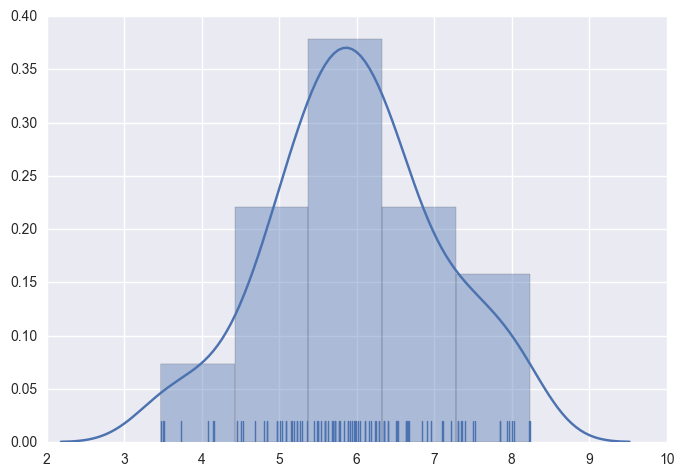

In [5]:
sns.distplot(dfTimes, #which data to use?
             hist=True,kde=True, #plot histogram/kde/both?
             rug=True, #include a rugplot?,
             bins=5
            );

Now, let's apply it to the spikes dataset.

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


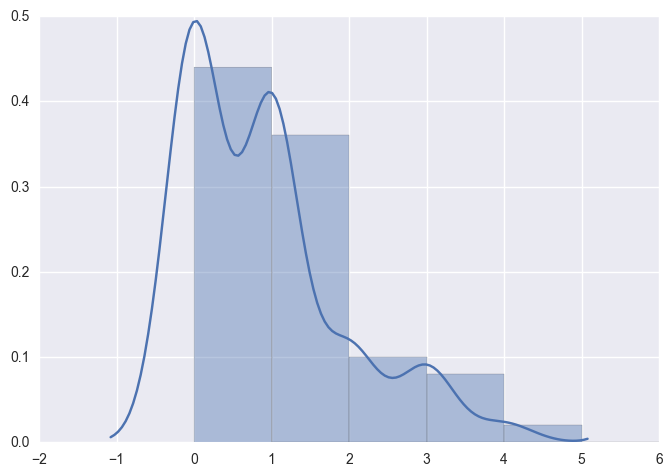

In [6]:
sns.distplot(dfSpike,hist=True,kde=True,bins=range(7));

This is certainly a much better picture of the data than the rugplot gave, but the bins don't line up nicely with our data. This is because seaborn has to guess where to put the bins, and finding the right bin size and location is as much art as science.

Adding the `bins` argument to distplot lets you set the location of the bins instead. You can either give a number, and distplot will place that many evenly-sized bins where it thinks is best, or you can give a list of locations for the left edges of the bins. First, play around with different numbers of bins for the reaction times dataset. Then, try fixing the histogram for the spikes data so that it represents the data better. *Hint*: calling the function `range` (i.e., typing in `range(N)`) will give you a list of numbers between `0` and `N-1`.

# Descriptive Statistics

Nowadays, thanks to ubiquitous, inexpensive, and easy-to-use computation and communication, building high-quality visualizations of your data is a breeze, you can iterate over multiple different visualizations (e.g. histograms with different bin sizes) in seconds, and you can share those visualizations instantly with anyone with an internet connection.

Before these happy days, there was more interest in simple descriptions of datasets that could be easily computed, compared against tables, and shared with colleagues -- where is the "center" of the data? is the data more likely to be above the center or below the center? are there any data points that fall very far away from the others?

These simple descriptions, which are all calculated from the dataset and so are all *statistics*, are still incredibly useful for distilling information out of data. One of the major goals of this course is to learn what these statistics do and do not tell you, what assumptions about your data are necessary to use them, and when they can lead you astray.

## Measures of "Center": Mean and Median

### Mean

Perhaps the most commonly-used statistic is the mean, also known as the average value or the *expected value*. To calculate the mean of a dataset, we simply add up all of the values and divide by the size of the dataset. We write this mathematically as:

$$\text{mean} = \frac{1}{N} \sum_i{x_i}$$

Where the capital Greek letter $\Sigma$ ("sigma") means "add up" or "sum".

Below, implement a function that computes and returns the mean of a dataset using a `for` loop. The last line in the cell checks to make sure that your function did the right thing by comparing the output of your function to the output of numpy's mean function. If you're getting an `AssertionError` when you run the cell below, that means your mean function isn't doing the right thing.

In [7]:
def findMean(dataset):
    N = 0
    runningTotal = 0
    
    for datavalue in dataset:
        N = N + 1
        runningTotal = runningTotal + datavalue
        
    mean = runningTotal/N
    
    return mean

assert findMean(dfTimes.times) == np.mean(dfTimes.times)

It's important not to confuse the math term *expected* with our intuition about what we "expect" from a random event. For example, the "expected outcome" of rolling a die is 3.5, but you should not "expect" to see 3.5 when you roll a die. The [psychological notion of expectation](https://en.wikipedia.org/wiki/Expectation_%28epistemic%29) is closer to the mathematical concept of [mode](https://en.wikipedia.org/wiki/Mode_%28statistics%29).

The mean can also be defined as the point that minimizes the squared error, where the squared error when you guess $a$ and the answer is $b$ is $(a-b)^2$. That is, imagine we're playing a game where you pick a point on the number line and I pick a random point from the dataset. We then calculate the squared error, and you earn more money the smaller that value is. The mean is the value to pick that will maximize your winnings.

If you're not one for games, here's one more way to think of the mean. Recall that we introduced probability mass and density functions by a physical analogy, where probability was analogous to mass. Continuing that analogy, we can understand the mean as the "balancing point" of an object described by a given probability mass or density function -- as indicated in the image below, it's the place where you would put the wedge of a see-saw in order to maintain balance. In physics, this is called the "center of mass".

![expectation](img/expectation.png) Modified image from [Wikipedia](https://en.wikipedia.org/wiki/File:Beta_first_moment.svg).

### Median

The *median* is another statistic used to quantify the "center" of a dataset. The median of a dataset is the value "in the middle" of all of points in a dataset: as many data values are above the median as are below the median. If there is an odd number of points in a dataset, the median is a data point -- $\frac{N-1}{2}$ points are above and below this point. If the number of data points is even, then there is not a unique point that has half of the data above and below it. The dataset splits into two halves, each of size $\frac{N}{2}$, and any point between the maximum of the smaller half and the minimum of the larger half has the same number of points above it as below. We choose the median to be halfway between these two numbers.

Defining a function that calculates the median is harder than for the mean. If you need to calculate the median, use the `np.median` function on the dataset or call the `.median()` method of a pandas column.

In [8]:
assert np.median(dfTimes.times) == dfTimes.times.median() #these are the same thing!
assert dfTimes.times.median() == dfTimes['times'].median() #two equivalent ways to write the pandas version

The median can also be viewed as the winning strategy in a game, just like the mean. Imagine we play the same game, where you pick a point on the number line and I pick a data point at random, but now, we measure the difference between the two points instead of the squared error: $\lvert a - b \rvert$ instead of $(a-b)^2$. The new winning strategy is to pick the median, instead of the mean.

The "center of mass" interpretation of the mean made it easy to generalize the mean to data with more than one dimension. It's natural to ask if we can generalize the median in the same way. Unfortunately, the point with as much data on one side as the other and the point that wins the game described above are not the same when the data has two or more dimensions. As such, there's not an obvious way to extend the median to multi-dimensional data. See the discussion [here](https://en.wikipedia.org/wiki/Median#Multivariate_median) for a few alternatives.

### Means versus Medians

Both the mean and the median claim to measure the "center" of a dataset. So which is better? The answer depends on your data. Specifically, it depends on whether your data is *skewed* or not -- whether values far away from the mean have a tendency to be either big or small, rather than being evenly distributed. For example, incomes are highly skewed upwards, since there are a small number of individuals with incomes orders of magnitude greater than the majority of individuals. On the other hand, human heights are roughly evenly distributed around a central value of 5 feet, 6 inches, and it is roughly as uncommon to find someone half again as tall (around 8 feet) as it is to find someone two-thirds that height (around 3 feet, 6 inches)

When we encounter a new dataset, how are we to know whether it is skewed or not? The remainder of our descriptive statistics, and especially our visualizations thereof, will help us answer that question.

## Measures of "Spread": Variance and Percentiles

### Variance

In our discussion of the mean, we imagined playing a game where I picked random datapoints from the dataset and you won more money the smaller the squared value of the error was. The mean was the number to pick that would win you the most money.

If you wanted to know how much money you'd expect to win or lose, you'd have to calculate the mean squared error. In mathematical terms, that would be:

$$\text{mean squared error} = \frac{1}{N} \sum_i (x_i-\mu)^2 $$

where the Greek letter $\mu$ stands for the mean. This quantity is called the *variance* of your data. The bigger it is, the further your datapoints are from the mean, on average.

Below, define a function that will compute the variance of a dataset. I'd suggest using the `findMean` function you've already written!

In [9]:
def findVariance(dataset):
    mean = findMean(dataset)
    variance = findMean((dataset-mean)**2)
    return variance

assert np.allclose(np.var(dfTimes.times),findVariance(dfTimes.times))

The variance has a physical counterpart, just like the mean. While the mean tells you where a distribution will "balance", the variance tells you how hard it would be to "spin" the data around that point. The technical term for this in physics is the *moment of inertia*.

What are the units of the variance? If our measurements were in rate or time, then our variance has units of rate$^2$ or time$^2$. This makes it difficult to compare the mean with the variance directly. Instead, we can take the square root of the variance to get a quantity called the *standard deviation*, abbreviated *sd*, *std*, or $\sigma$ (from which the variance gets its nickname $\sigma^2$).

Below, define a function that uses your `findVariance` function to compute the standard deviation. HINT: numpy has a square root function: `np.sqrt`. It works on numbers or on lists of numbers. In the latter case, it gives you a list of square roots.

In [10]:
def findSTD(dataset):
    variance = findVariance(dataset)
    return np.sqrt(variance)
    
assert np.allclose(np.std(dfTimes.times),findSTD(dfTimes.times))

### Quartiles and Percentiles

We can extend the idea of the median as "the point with half of the data points below it" to points with different fractions of the dataset below them. For example, we can ask which point has one quarter of the data below it, or one eighth, or one one-hundredth. For each fraction, we get a collection of points: a point with one quarter, two quarters, and three quarters of the data below it, for example, or all of the points with one, two, three, four, ... up to ninety-nine one-hundredths of the data below them. These give us a sense for how our data is spread out, in addition to where its center is.

These points partition, or divide up, our data into equally-sized groups: the data points below the first in the collection, between the first and the second, and so on. In the case of quarters and hundredths, these groups have names: *quartiles* and *percentiles*, respectively. They are named in order: the *first quartile* is all of the data points below the first point in the quartering collection, the *37th percentile* is the collection of data points between the 36th and 37th in the collection that divides our data into one hundred equal groups, and so on.

Quartiles are useful for getting a quick sense of how our data is spread out. If the two middle quartiles are the same width, then the data is roughly symmetric -- we have go as far below our middle value as above it in order to cover one quarter of the data points. If one is larger than the other, then our data is more spread out in that direction, since we have to move further in order to cover the same number of data points.

These ideas are easier to grasp visually, so below, we'll visualize some examples of both cases with boxplots.

But first, a quick side note: you can calculate the mean, median, standard deviation, and quartiles for every column in a pandas data frame by using the method `.describe()`. It's a handy way to start looking at your data.

In [11]:
dfTimes.describe()

,times
count,100.000000
mean,5.973210
std,1.087751
min,3.469913
25%,5.259015
50%,5.924395
75%,6.632764
max,8.230344


## Making Boxplots with Seaborn

Check out the *Points of Significance* article ["Visualizing Samples with Boxplots"](https://www.nature.com/nmeth/journal/v11/n2/full/nmeth.2813.html) to learn more about *boxplots*, which are used to visualize a dataset in terms of its descriptive statistics.

Below, we'll focus on the example of a boxplot to learn more about how to use `seaborn` and `matplotlib`.

### Seaborn and matplotlib

Matplotlib is the premier plotting package for Python. It's based on plotting in MATLAB, which is one of that language's best features. Matplotlib is flexible and powerful enough that other plotting libraries have been built on top of it!

With that flexibility comes complexity, and matplotlib can be intimidating to new users. In this course, we'll primarily be doing statistical visualization, so we don't need all of matplotlib's power. We'll make things easier on ourselves by using a plotting library built on top of matplotlib called seaborn that specializes in statistical visualization.

### Making Boxplots

Making a standard visualization with no customization is easy in seaborn. We were able to make passable histograms above just by using a single function. We can do the same with a boxplot.

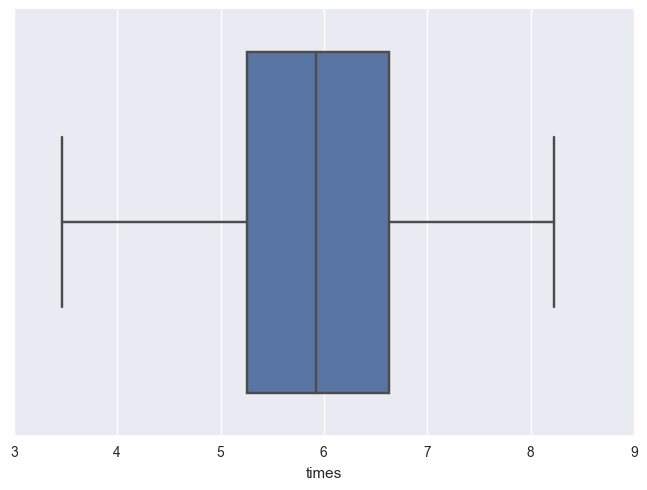

In [12]:
sns.boxplot(data=dfTimes,x='times',);

Unfortunately, the default choices that seaborn makes aren't always perfect. For example, this boxplot is too tall and not long enough.

Each visualization is a `figure`, and `figure`s have `axes`. Seaborn makes a standard figure and axis and then draws its plots onto the axes. If we want to make changes to the figure or the axes, we will often need to use pyplot functions. To learn more about using pyplot, check out the [online tutorial](http://matplotlib.org/users/pyplot_tutorial.html). For the purposes of this class, we'll introduce new functions as needed.

To change the shape of the figure that seaborn is drawing in, we need to make the figure ourselves. We make figures with the function `plt.figure`, and we can change its size by including the keyword input `figsize`. Change the `size` variable in the cell below to a few different values and see what comes out.

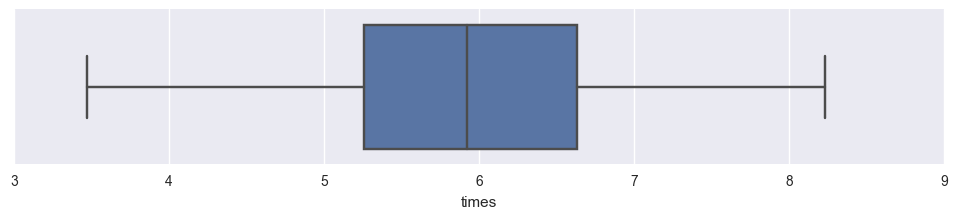

In [13]:
size = [12,2]

fig = plt.figure(figsize=size)

sns.boxplot(data=dfTimes,x='times',);

Luckily, seaborn does give us control over the style of the plot that it draws. I've made a few style changes that I think make the plot below look better than the one above. Make your own changes to at least the following plot style elements: `saturation`, `color`, `linewidth`,`orient`. All of these are keyword arguments. You can learn more about them in the
[seaborn online documentation](http://seaborn.pydata.org/generated/seaborn.boxplot.html).

Note that colors can be English names, [RGB values](), or [hex values](http://www.color-hex.com/color-names.html). Check out the [matplotlib online documentation](http://matplotlib.org/api/colors_api.html) for more information.

If you're ambitious and have some experience with coding in Python, try figuring out how to use additional keyword arguments to adjust the style of the boxplot even further. You'll need to check out both the [seaborn docs](http://seaborn.pydata.org/generated/seaborn.boxplot.html) (you're looking for `**kwargs`) and the [pyplot docs](http://matplotlib.org/api/pyplot_api.html) (`ctrl-f .boxplot(` ).

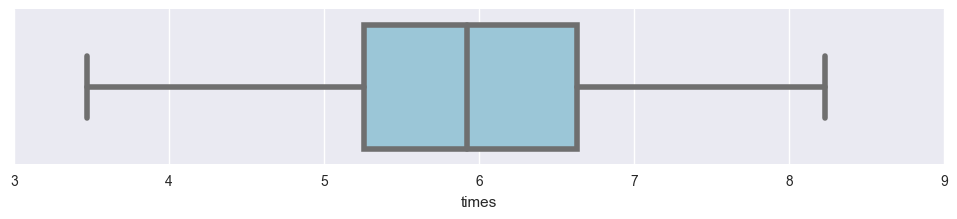

In [14]:
size = [12,2]
fig = plt.figure(figsize=size)

sns.boxplot(data=dfTimes,x='times',
            linewidth=4,color='skyblue',
            saturation=0.6);

Now, let's talk a bit about what this boxplot is telling us. The box in the middle covers the second and third quartiles. Inside the box, a solid line indicates the median value.

For this data, the line falls approximately in the middle of the box.

#### Q2 What does this suggest about how our data is distributed?

<font color='#1874CD'> ** A median in the middle of the boxplot means that the data is likely to be symmetric. **

Boxplots are also sometimes called "box-and-whisker plots". The *whiskers* are the two lines extending out from the edges of the box. In the past, these were often used to indicate the maximum and minimum values of the data. However, the maximum and minimum are sensitive to outliers. It is more common now to calculate the *inter-quartile range*, the difference between third quartile and first quartile, and to have the whiskers extend to the furthest points that are still within some multiple of that difference from the edges of the box (usually 1.5). Any data points outside of the reach of the whiskers are plotted on their own. This dataset has no outliers.

#### Q3 Why are the maximum and minimum sensitive to outliers, while the IQR is not?

<font color='#1874CD'> ** The maximum of a dataset can be changed by only one number -- imagine trying to estimate the maximum individual wealth in the collection "citizens of the United States". If you don't have any billionaires, you're going to be way off! This is a bad thing when those big values are actually outliers. **

** The IQR, on the other hand, depends on the whole dataset, so no single datapoint, or small group of datapoints, has as much influence. **

It can be helpful to see all of the datapoints at once, as in a rug- or scatterplot, in addition to the summary statistics provided by a boxplot. Luckily, seaborn lets us plot more than one thing on the same axis.

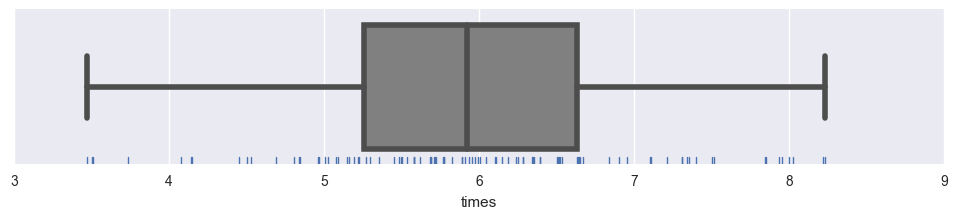

In [15]:
size = [12,2]
fig = plt.figure(figsize=size)

sns.boxplot(data=dfTimes,x='times',
            linewidth=4,color='grey');

sns.rugplot(dfTimes);

For this data, it was easy to combine a rugplot and a boxplot. When we are plotting more than one box, that approach won't work as well. Check out the [`stripplot` function](http://seaborn.pydata.org/generated/seaborn.stripplot.html) and, in the code cell below, use it to plot all of the datapoints on top of the boxplot.

Once you've got the basic version working, make the plot easier to read by using at least one of the following arguments: `jitter`, `color`, `alpha`, `size`.

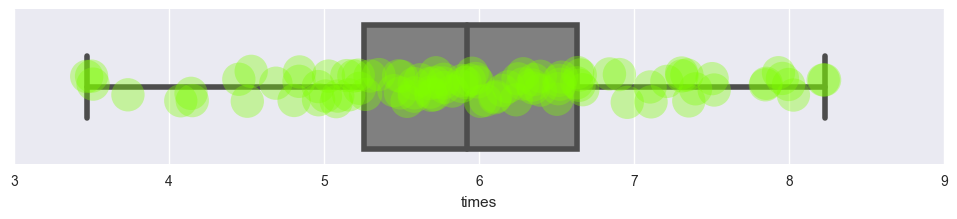

In [16]:
size = [12,2]
fig = plt.figure(figsize=size)

sns.boxplot(data=dfTimes,x='times',
            linewidth=4,color='grey');

sns.stripplot(data=dfTimes,x='times',
             alpha=0.35,jitter=True,
             size=24,color='chartreuse');

Lastly, make a boxplot with datapoints, as above, for the spike counts dataset. Neither `rugplot` nor the default choices for `stripplot` will give you a good visualization.

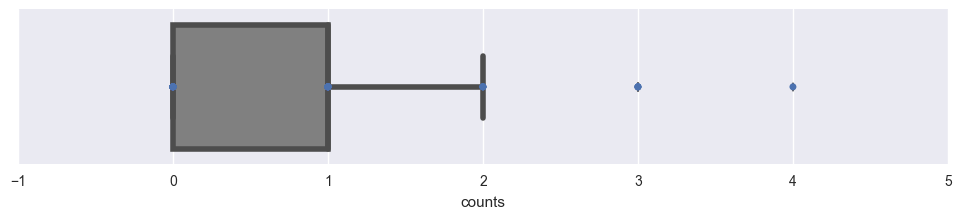

In [17]:
fig = plt.figure(figsize=(12,2))

sns.boxplot(data=dfSpike,x='counts',
           linewidth=4,color='grey');

sns.stripplot(data=dfSpike,x='counts');

#### Q4 Just based off of the boxplot, what can we tell about how this data is distributed?

<font color='#1874CD'> ** The data is heavily skewed upwards -- lots of outliers in that direction. The median (aka the second quartile) is equal to either the first or third quartile, but we can't tell just from the graph.**

Improve this visualization by either adjusting the arguments to `stripplot` (try `alpha` or `jitter`) or looking up the function [`swarmplot`](http://seaborn.pydata.org/generated/seaborn.swarmplot.html), which offers a more modern take on the one-dimensional scatterplot.

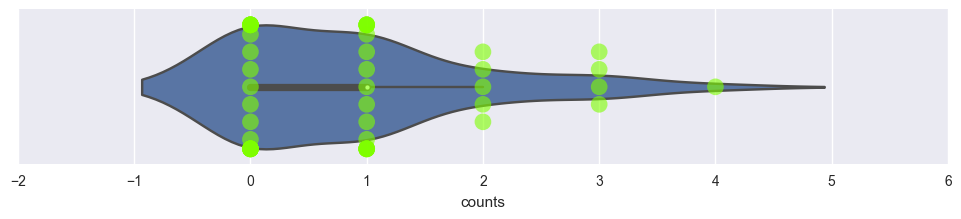

In [18]:
fig = plt.figure(figsize=(12,2))

#sns.boxplot(data=dfSpike,x='counts',
#          linewidth=4,color='grey',);

sns.violinplot(data=dfSpike,x='counts');

sns.swarmplot(data=dfSpike,x='counts',
             size=12,color='chartreuse',
             alpha=0.6);